# CatFusion: Diffusion model for generating cat images

# loading the dataset

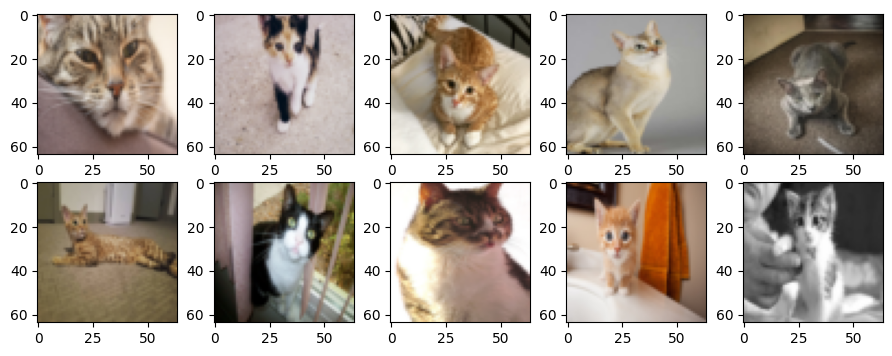

In [1]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

dataset = torch.load("datasets/cats.pth")

to_pil = transforms.ToPILImage()
fig = plt.figure(figsize=(11, 4))

columns = 5
rows = 2

for i in range(1,rows*columns + 1):
    fig.add_subplot(rows, columns, i)
    image, _ = dataset[i]
    plt.imshow(to_pil(image))

plt.show()

## Noise scheduler

D:\programs\python\datasci_ai\CatGenerator\noise_scheduler.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  timestep = torch.tensor(timestep).to(device)
D:\programs\python\datasci_ai\CatGenerator\noise_scheduler.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_timesteps = torch.tensor(total_timesteps).to(device)


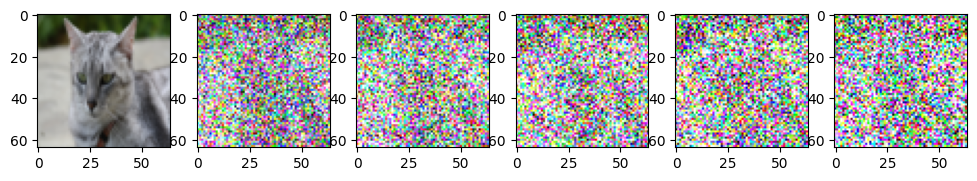

In [1]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from noise_scheduler import add_noise

columns = 6
rows = 1
to_pil = transforms.ToPILImage()

fig = plt.figure(figsize=(12, 3))

dataset = torch.load("datasets/cats.pth")
data, _ = dataset[5]

def get_timestep(data, timestep):
    data = add_noise(data, torch.tensor(timestep), torch.tensor(1000))
    image = to_pil(data[0])
    return image

for i in range(1,rows*columns + 1):
    fig.add_subplot(rows, columns, i)
    data, _ = dataset[20]
    plt.imshow(get_timestep(data,200 * (i-1)))

plt.show()


## Denoising the Image at once

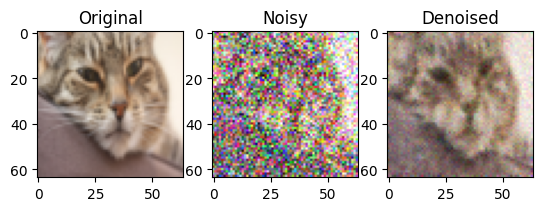

In [1]:
from test_single_datapoint import test_model
test_model(verbose=False)

## Backward process (on a single datapoint)

D:\programs\python\datasci_ai\CatGenerator\train.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_timesteps = torch.tensor(total_timesteps).to(device).clone().detach()
D:\programs\python\datasci_ai\CatGenerator\train.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_timesteps = torch.tensor(total_timesteps).to(device).clone().detach()


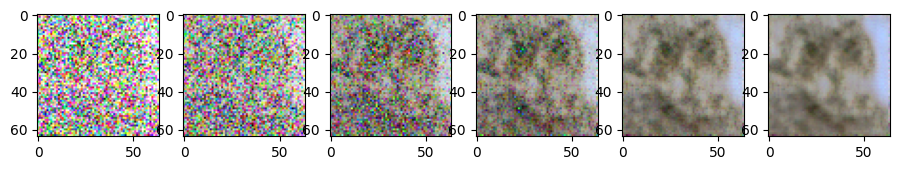

In [1]:
from test_final import test_model
test_model(verbose=False)

## Running trained model

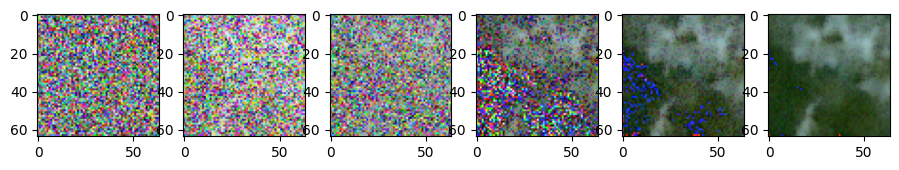

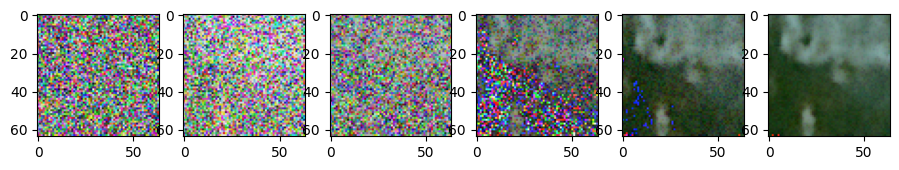

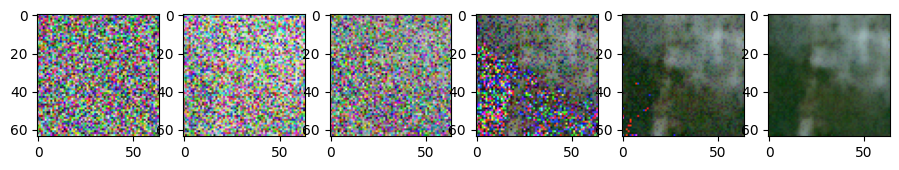

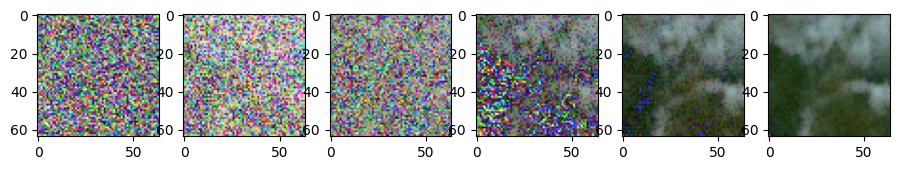

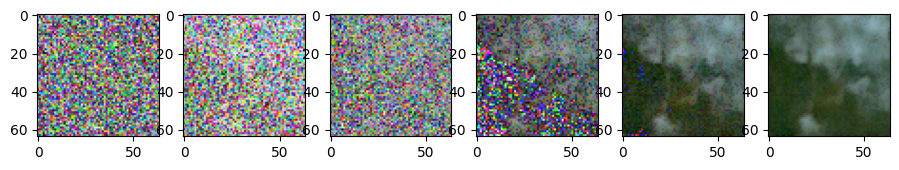

In [2]:
from model import DiffusionModel
import torch
from train import test_model

model = DiffusionModel(lr=0.01).to("cuda")
model.load("models/model_1_100.pth")
dataset = torch.load('datasets/cats.pth')
for i in range(5):
    test_model(model, dataset, 100, device="cuda", beta=0.025)